In [1]:
import numpy as np
import pandas as pd

stroke_scaled_df = pd.read_csv('stroke_scaled_df.csv',index_col=0)
stroke_scaled_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Private,work_type_Self-employed,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,1,0.874738,0,1,1,1,2.464581,0.819354,1,0,1,0,0,1,0,0
1,51676,0,0.499979,0,0,1,0,1.918619,0.342896,1,0,0,1,0,0,1,0
2,31112,1,1.686716,0,1,1,0,-0.066679,0.244801,1,0,1,0,0,0,1,0
3,60182,0,-0.249538,0,0,1,1,1.279876,0.511058,1,0,1,0,0,0,0,1
4,1665,0,1.624256,1,0,1,0,1.339462,-0.946345,1,0,0,1,0,0,1,0


In [22]:
from imblearn.combine import SMOTEENN 
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

X = stroke_scaled_df.drop(['stroke','id'], axis=1)
y = stroke_scaled_df['stroke']

#Oversampling
resample = SMOTEENN()

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=101, stratify=y)

# #Standardize
# sc = StandardScaler()
# X_train_scaler = sc.fit_transform(X_train)
# X_test_scaler = sc.fit_transform(X_test)

# classifier = SVC(kernel='rbf')
# classifier.fit(X_train_scaler,y_train)
# y_pred = classifier.predict(X_test_scaler)

# steps = [('r', resample),('m', classifier)]
# pipeline = Pipeline(steps=steps)

# # define evaluation procedure
# cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

# #Evaluate model
# scoring=['accuracy','precision_macro','recall_macro']
# scores = cross_validate(pipeline, X_train_scaler, y_train, scoring=scoring, cv=cv, n_jobs=-1)

# # summarize performance
# print('Mean Accuracy: %.4f' % np.mean(scores['test_accuracy']))
# print('Mean Precision: %.4f' % np.mean(scores['test_precision_macro']))
# print('Mean Recall: %.4f' % np.mean(scores['test_recall_macro']))

# print(confusion_matrix(y_test,y_pred))

# #Classification Report
# print(classification_report(y_test, y_pred))

In [23]:
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SVMSMOTE
svmsmote = SVMSMOTE(random_state = 101)

X_oversample_svm, y_oversample_svm = svmsmote.fit_resample(X_train, y_train)
classifier_svm = LogisticRegression()
classifier_svm.fit(X_oversample_svm, y_oversample_svm)
print(classification_report(y_test, classifier_svm.predict(X_test)))

print(confusion_matrix(y_test,classifier_svm.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.84      0.90      1152
           1       0.18      0.46      0.25        82

    accuracy                           0.82      1234
   macro avg       0.57      0.65      0.58      1234
weighted avg       0.90      0.82      0.85      1234

[[973 179]
 [ 44  38]]


(<Figure size 432x288 with 3 Axes>,
 {('0', '0'): (0.0, 0.0, 0.9289049081980697, 0.841812015503876),
  ('0', '1'): (0.0,
   0.8451342746400885,
   0.9289049081980697,
   0.15486572535991136),
  ('1', '0'): (0.9338800325761792,
   0.0,
   0.06611996742382091,
   0.5348026902195933),
  ('1', '1'): (0.9338800325761792,
   0.5381249493558058,
   0.06611996742382091,
   0.4618750506441941)})

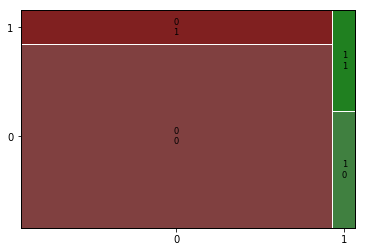

In [24]:
conf_matrix = confusion_matrix(y_test, classifier_svm.predict(X_test))
from statsmodels.graphics.mosaicplot import mosaic
mosaic(conf_matrix)

In [25]:
from imblearn.over_sampling import ADASYN
adasyn = ADASYN(random_state = 101)
X_oversample_ada, y_oversample_ada = adasyn.fit_resample(X_train, y_train)
classifier_ada = LogisticRegression()
classifier_ada.fit(X_oversample_ada, y_oversample_ada)
print(classification_report(y_test, classifier_ada.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.80      0.87      1152
           1       0.17      0.57      0.26        82

    accuracy                           0.78      1234
   macro avg       0.56      0.68      0.56      1234
weighted avg       0.91      0.78      0.83      1234



(<Figure size 432x288 with 3 Axes>,
 {('0', '0'): (0.0, 0.0, 0.9289049081980697, 0.7899017165005536),
  ('0', '1'): (0.0,
   0.7932239756367663,
   0.9289049081980697,
   0.20677602436323367),
  ('1', '0'): (0.9338800325761792,
   0.0,
   0.06611996742382091,
   0.5348026902195933),
  ('1', '1'): (0.9338800325761792,
   0.5381249493558058,
   0.06611996742382091,
   0.4618750506441941)})

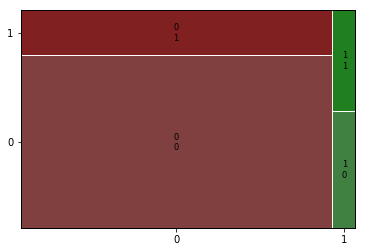

In [21]:
conf_matrix = confusion_matrix(y_test, classifier_ada.predict(X_test))
from statsmodels.graphics.mosaicplot import mosaic
mosaic(conf_matrix)